<a href="https://colab.research.google.com/github/kevin-r-murphy/ba820/blob/main/BA820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Beyond the Headlines: Machine Learning Insights for News Articles**

**Team Members Group 6**: Kevin Murphy, Khushi Manish Jasrapuria, Megha Arul Senthilkumar, Riris Grace Karolina, Shravani Thalla

##**Table of Contents**

1.   Problem Definition
2.   Data Source
3.   Importing Modules and Libraries
4.   Upload the Data
5.   Data Cleaning
6.   Exploratory Data Analysis (EDA)
7.   Preliminary Analysis

##Problem Definition

Use NLP and clustering to correctly classify categories to news article headlines and investigate what aspects of the headline and the short description contribute to identifying trending topics, sentiment analysis, and prioritizing articles accordingly.
Our motivation for this project is to meet the demand for efficient and relevant content management by news organizations to enhance reader satisfaction and engagement.


##Data Source##

Our data is sourced from the news dataset news headlines from 2012 to 2022 from HuffPost available on Kaggle: https://www.kaggle.com/datasets/rmisra/news-category-dataset.

Each record in the dataset consists of the following attributes:



1.   link: link to the original news article.
2.   headline: the headline of the news article.
3.   category: category in which the article was published.
4.   short_description: Abstract of the news article.
5.   authors: list of authors who contributed to the article.
6.   date: publication date of the article.

## Importing Modules And Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import sklearn
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Upload the Data

In [2]:
df = pd.read_json('https://raw.githubusercontent.com/kevin-r-murphy/ba820/main/News_Category_Dataset_v3.json', lines=True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


Though the above output doesn't say it has null values, we could observe that there were blank spaces.

In [4]:
df[df['link']=='']

,link,headline,category,short_description,authors,date


In [5]:
df[df['headline']=='']

,link,headline,category,short_description,authors,date
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
103675,https://www.huffingtonpost.com/entry/us-and-eu...,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
109100,https://www.huffingtonpost.com/entry/disney-ce...,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
110153,https://www.huffingtonpost.com/entry/beverly-h...,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [6]:
df=df[df['headline']!='']

In [7]:
df[df['category']=='']

,link,headline,category,short_description,authors,date


In [8]:
df[df['short_description']=='']

,link,headline,category,short_description,authors,date
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [9]:
df=df[df['short_description']!='']

In [10]:
df[df['authors']=='']

,link,headline,category,short_description,authors,date
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
20,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",,2022-09-20
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19
31,https://www.huffpost.com/entry/2020-census-fal...,Watchdog Report Finds Some Census Takers Who F...,U.S. NEWS,"Despite entering false information, their work...",,2022-09-18
38,https://www.huffpost.com/entry/african-land-sn...,German Customs Officials Follow Trail Of Slime...,WEIRD NEWS,“Never in the history of the Duesseldorf custo...,,2022-09-16
...,...,...,...,...,...,...
209520,https://www.huffingtonpost.comhttp://www.engad...,"First White House Chief Technology Officer, An...",TECH,He was appointed with a fair bit of fanfare as...,,2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [11]:
df=df[df['authors']!='']

In [12]:
df[df['date']=='']

,link,headline,category,short_description,authors,date


## Exploratory Data Analysis (EDA)

In [13]:
#Printing the number of unique values of each column
print(df.nunique())

link                 156859
headline             155944
category                 42
short_description    154932
authors               28312
date                   3889
dtype: int64


In [14]:
#Printing the number of articles per each category
categorical_columns = ['category']
for column in categorical_columns:
    print(f"\nDistribution of categories in column '{column}':")
    print(df[column].value_counts())


Distribution of categories in column 'category':
POLITICS          29685
ENTERTAINMENT     13463
WELLNESS          12944
TRAVEL             8024
STYLE & BEAUTY     7275
PARENTING          6520
HEALTHY LIVING     5072
QUEER VOICES       4700
FOOD & DRINK       4527
BUSINESS           4373
COMEDY             3934
SPORTS             3608
HOME & LIVING      3523
PARENTS            3491
BLACK VOICES       3313
IMPACT             2945
WOMEN              2921
WORLD NEWS         2678
THE WORLDPOST      2198
MEDIA              2105
CRIME              2093
WEIRD NEWS         1965
TASTE              1891
RELIGION           1780
WEDDINGS           1705
DIVORCE            1695
GREEN              1682
TECH               1681
MONEY              1539
STYLE              1535
SCIENCE            1428
ARTS & CULTURE     1307
WORLDPOST          1242
U.S. NEWS          1093
FIFTY              1042
GOOD NEWS           917
EDUCATION           893
LATINO VOICES       878
ARTS                863
COLLEGE       

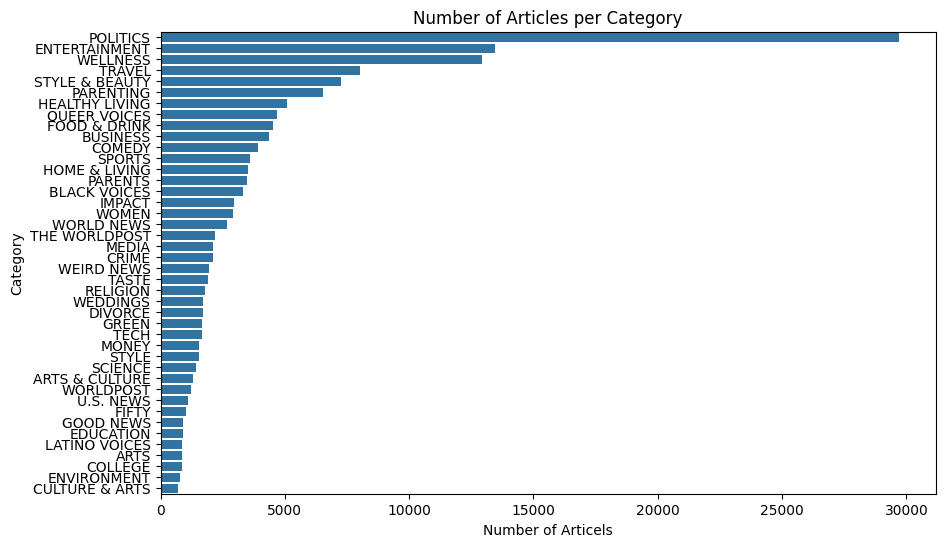

In [15]:
#Plotting Number of Articles by Category
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order = df['category'].value_counts().index)
plt.title('Number of Articles per Category')
plt.xlabel('Number of Articels')
plt.ylabel('Category')
plt.show()

The graph above shows the frequency of nubmer of articles that were published with respect to each of the 42 categories across our dataset. From this, it can be seen clearly that "Politics" is the most common news category from 2012 to 2022, followed by "Wellness" and "Style and beauty" whereas "Arts" is the least common.

In [16]:
#Conveting the date format
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [17]:
years = sorted(df['year'].unique())
years

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

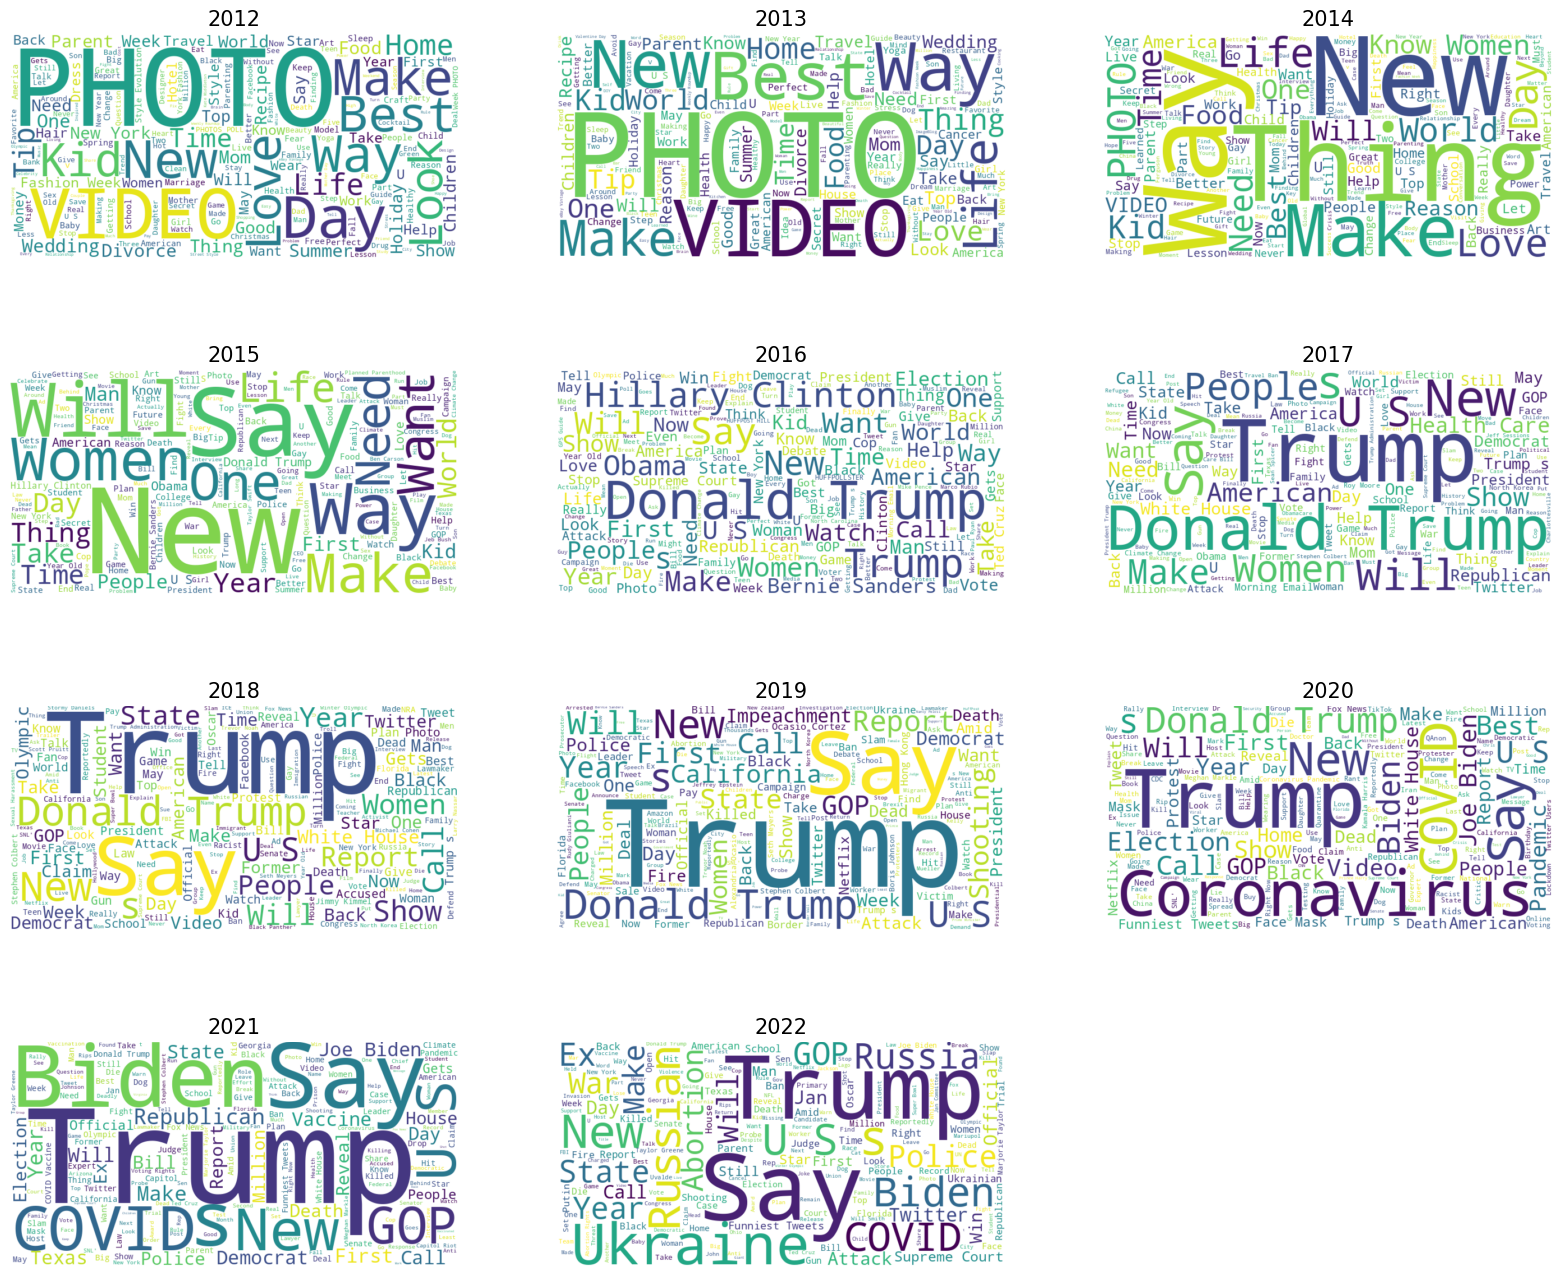

In [18]:
#Number of rows and grid for subplots
nrows = len(years) // 3 + (len(years) % 3 > 0)
fig, axes = plt.subplots(nrows, 3, figsize=(20, nrows * 4))
fig.subplots_adjust(hspace=0.5)

#Plotting wordcloud for respective years
for ax, year in zip(axes.flatten(), years):
    year_text = ' '.join(df[df['year'] == year]['headline'].dropna().values)

    word_cloud = WordCloud(width=800, height=400, background_color="white").generate(year_text)

    ax.axis("off")
    ax.imshow(word_cloud, interpolation="bilinear")
    ax.set_title(str(year), fontsize=15)

for ax in axes.flatten()[len(years):]:
    ax.axis("off")

plt.show()

Above is the collection of the wordclouds for each year from 2012 to 2022. The words with highest count includes "Trump","Donald", "President","Biden" which supports the fact that "politics" is the most frequently mentioned category.It could also relate to the "entertainemnt".

After "Politics" related words, we can see the prevalance of the words like "COVID", Coronavirus", "Vaccine" which are related "wellness"

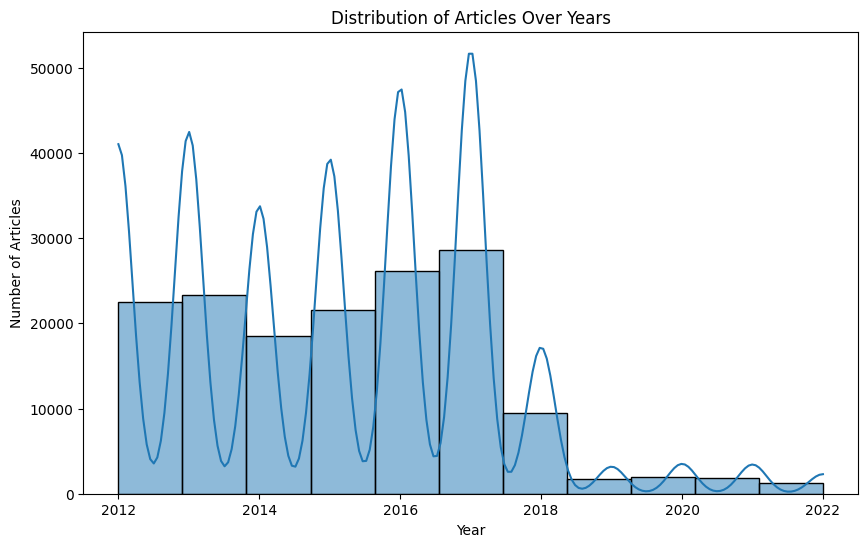

In [19]:
#Plotting Distribution of Articles over years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', bins=len(df['year'].unique()), kde=True)
plt.title('Distribution of Articles Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

The graph above shows the distribution of news articles in terms of number of articles published each year spanning across a time period of 10 years from 2012 - 2022. It shows how the number of articles published peaked during the years of 2016-2017 but then dropped drastically in the years following 2018 to 2022 to less than 10 articles per year

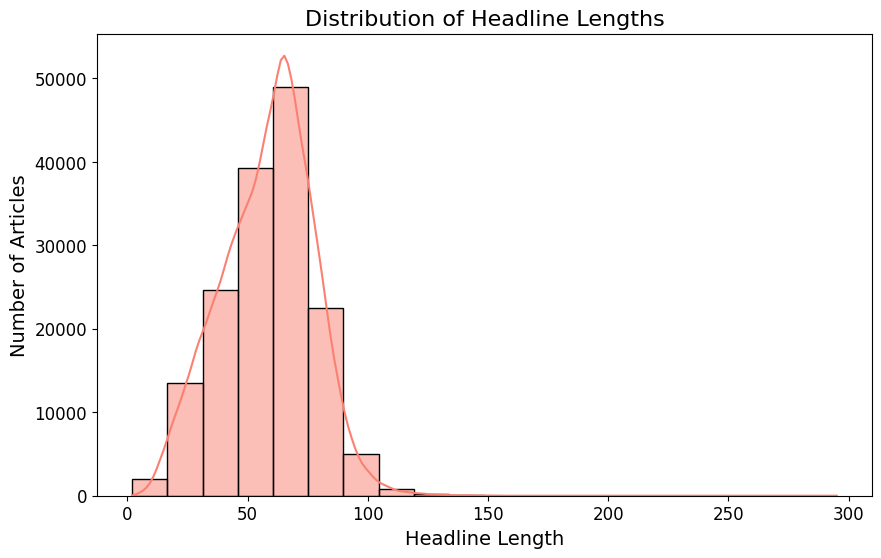

In [20]:
#Finding length of each headline
df['headline_length'] = df['headline'].apply(len)

#Plotting Distribution of Headline lengths for articles
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This graph shows the distribution of headline lenghts in terms of number of words and shows the frequency for each. As seen clearly, there is a normal distribution and it implies that headlines that have a length of 60-80 are mosr frequent, having a count of >50, as compared to other headline lenghts that range less than 40 words or even greater than 100 words, their count ranges from 0-20 at max.

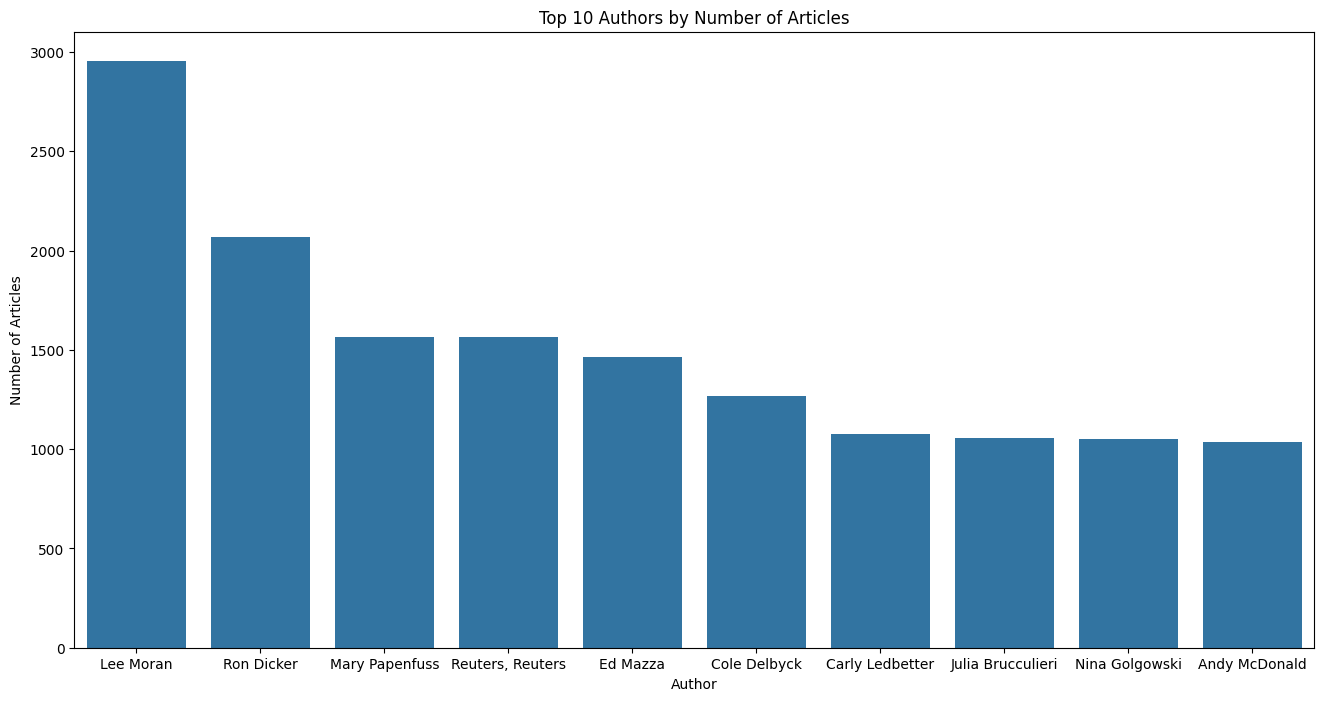

In [21]:
#Top 10 Authors
top10_authors = df['authors'].value_counts().head(10)

#Plotting the Top 10 Authors
plt.figure(figsize=(16, 8))
sns.barplot(x=top10_authors.index, y=top10_authors.values )
plt.title('Top 10 Authors by Number of Articles')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.show()

The graph provides clear visual representation of the produvtivity of these authors in terms of the articles produced. Lee Moran is th eauthor with the highest number of articles with the count close to 3000 and Ron Dicker follows the second most.

## Preliminary Analysis

Since the dataset was too large for us to analyze, we randomly sampled 5000 entries for our preliminary analysis. For this analysis, we used two features: Headline and Short Description. Our pre-analysis steps included:
*   Tokenizing and vectorizing the headlines & Short Description.
*   Apply the Bag of Words as our baseline model.
*   Applying the same experiment with TF/IDF.
*   Classifying the news using an n-gram model (ranging from unigrams to trigrams) by training and splitting the data.
*   Applying the Word2Vec Model for Headline & Short Description.


In [22]:
#Selecting only 5000 rows on random basis
#df= df.sample(n=5000, random_state=42)

In [23]:
headlines = pd.DataFrame(df['headline'], columns =['headline'])

#Converting headlines to lowercase and removig any punctuation

headlines = headlines['headline'].str.lower().str.replace('[^\w\s]','')
headlines

<ipython-input-23-7ebc63528108>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  headlines = headlines['headline'].str.lower().str.replace('[^\w\s]','')


0         over 4 million americans roll up sleeves for o...
1         american airlines flyer charged banned for lif...
2         23 of the funniest tweets about cats and dogs ...
3         the funniest tweets from parents this week sep...
4         woman who called cops on black birdwatcher los...
                                ...                        
209517                           good games  is it possible
209518       google now open for teens with some safeguards
209519                                             web wars
209521           watch the top 9 youtube videos of the week
209522    rim ceo thorsten heins significant plans for b...
Name: headline, Length: 156859, dtype: object

In [24]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
#Lemmatize the headlines
lemma_headline = [lemmatizer.lemmatize(t) for t in headlines]
lemma_headline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['over 4 million americans roll up sleeves for omicrontargeted covid boosters',
 'american airlines flyer charged banned for life after punching flight attendant on video',
 '23 of the funniest tweets about cats and dogs this week sept 1723',
 'the funniest tweets from parents this week sept 1723',
 'woman who called cops on black birdwatcher loses lawsuit against exemployer',
 'reporter gets adorable surprise from her boyfriend while live on tv',
 'puerto ricans desperate for water after hurricane fionas rampage',
 'how a new documentary captures the complexity of being a child of immigrants',
 'biden at un to call russian war an affront to bodys charter',
 'world cup captains want to wear rainbow armbands in qatar',
 'man sets himself on fire in apparent protest of funeral for japans abe',
 'fiona threatens to become category 4 storm headed to bermuda',
 'twitch bans gambling sites after streamer scams folks out of 200000',
 'virginia thomas agrees to interview with jan 6 panel',
 'r

In [25]:
short_description = pd.DataFrame(df['short_description'], columns =['short_description'])

#Converting short descriotion to lowercase and removing any punctuation
short_description = short_description['short_description'].str.lower().str.replace('[^\w\s]','')
short_description

<ipython-input-25-d48614e75d57>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  short_description = short_description['short_description'].str.lower().str.replace('[^\w\s]','')


0         health experts said it is too early to predict...
1         he was subdued by passengers and crew when he ...
2         until you have a dog you dont understand what ...
3         accidentally put grownup toothpaste on my todd...
4         amy cooper accused investment firm franklin te...
                                ...                        
209517    i dont think people who play zynga games are b...
209518    for the most part teens experience on google w...
209519    these web wars threaten to rage on for some co...
209521    if youre looking to see the most popular youtu...
209522    verizon wireless and att are already promoting...
Name: short_description, Length: 156859, dtype: object

In [26]:
lemmatizer = WordNetLemmatizer()
#Lemmatize the short description
lemma_short_description = [lemmatizer.lemmatize(t) for t in short_description]
lemma_short_description

['health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the us ordered for the fall',
 'he was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation according to the us attorneys office in los angeles',
 'until you have a dog you dont understand what could be eaten',
 'accidentally put grownup toothpaste on my toddlers toothbrush and he screamed like i was cleaning his teeth with a carolina reaper dipped in tabasco sauce',
 'amy cooper accused investment firm franklin templeton of unfairly firing her and branding her a racist after video of the central park encounter went viral',
 'whos that behind you an anchor for new yorks pix11 asked journalist michelle ross as she finished up an interview',
 'more than half a million people remained without water service three days after the storm lashed the us territory',
 'in mija director isabel castro combined music documentaries wit

###Bag of Words

Using Bag of words to Vectorize the sentences in Headline and Short Description

In [27]:
#Initializing CountVectorizer with English stop words
cv = CountVectorizer(stop_words='english') #tokenizer= lambda x: word_tokenize(x), remove the stop_words='english'

#Fitting CountVectorizer to headline
cv.fit(lemma_headline)

#Printing the vocabulary with number of unique words i.e tokens
print('number of `tokens`', len(cv.vocabulary_))
cv.vocabulary_

number of `tokens` 59478


{'million': 34210,
 'americans': 3169,
 'roll': 45577,
 'sleeves': 49088,
 'omicrontargeted': 37872,
 'covid': 12993,
 'boosters': 7572,
 'american': 3158,
 'airlines': 2595,
 'flyer': 20706,
 'charged': 10268,
 'banned': 5494,
 'life': 30931,
 'punching': 42579,
 'flight': 20535,
 'attendant': 4713,
 'video': 56810,
 '23': 710,
 'funniest': 21630,
 'tweets': 55118,
 'cats': 9802,
 'dogs': 16147,
 'week': 57726,
 'sept': 47652,
 '1723': 352,
 'parents': 39171,
 'woman': 58493,
 'called': 9090,
 'cops': 12621,
 'black': 6883,
 'birdwatcher': 6786,
 'loses': 31580,
 'lawsuit': 30378,
 'exemployer': 18784,
 'reporter': 44508,
 'gets': 22305,
 'adorable': 2194,
 'surprise': 51921,
 'boyfriend': 7819,
 'live': 31238,
 'tv': 55090,
 'puerto': 42511,
 'ricans': 45076,
 'desperate': 15075,
 'water': 57535,
 'hurricane': 26039,
 'fionas': 20192,
 'rampage': 43244,
 'new': 36424,
 'documentary': 16102,
 'captures': 9397,
 'complexity': 11983,
 'child': 10584,
 'immigrants': 26500,
 'biden': 6594

In [28]:
"""
#Transforming the headline sentences to BoW Format
dtm_headline = cv.transform(lemma_headline)
bow_headline = pd.DataFrame(dtm_headline.toarray(), columns=cv.get_feature_names_out())
bow_headline
"""

'\n#Transforming the headline sentences to BoW Format\ndtm_headline = cv.transform(lemma_headline)\nbow_headline = pd.DataFrame(dtm_headline.toarray(), columns=cv.get_feature_names_out())\nbow_headline\n'

In [29]:
"""
#Initializing CountVectorizer with English stop words
cv1 = CountVectorizer(stop_words='english')

#Fitting CountVectorizer to short_description
cv1.fit(lemma_short_description)

#Printing the vocabulary with number of unique words i.e tokens
print('number of `tokens`', len(cv1.vocabulary_))
cv1.vocabulary_
"""

"\n#Initializing CountVectorizer with English stop words\ncv1 = CountVectorizer(stop_words='english')\n\n#Fitting CountVectorizer to short_description\ncv1.fit(lemma_short_description)\n\n#Printing the vocabulary with number of unique words i.e tokens\nprint('number of `tokens`', len(cv1.vocabulary_))\ncv1.vocabulary_\n"

In [30]:
"""
#Transforming the short_description sentences to BoW Format
dtm_short_desc = cv1.transform(lemma_short_description)
bow_short_desc = pd.DataFrame(dtm_short_desc.toarray(), columns=cv1.get_feature_names_out())
bow_short_desc
"""

'\n#Transforming the short_description sentences to BoW Format\ndtm_short_desc = cv1.transform(lemma_short_description)\nbow_short_desc = pd.DataFrame(dtm_short_desc.toarray(), columns=cv1.get_feature_names_out())\nbow_short_desc\n'

In [31]:
"""
# Inverse transforming the bag-of-words representation
recognized_tokens_sentence0 = cv.inverse_transform([bow_headline.iloc[1]])
recognized_tokens_sentence0
"""

'\n# Inverse transforming the bag-of-words representation\nrecognized_tokens_sentence0 = cv.inverse_transform([bow_headline.iloc[1]])\nrecognized_tokens_sentence0\n'

In [32]:
"""
# Inverse transforming the bag-of-words representation
recognized_tokens_sentence1 = cv1.inverse_transform([bow_short_desc.iloc[2]])
recognized_tokens_sentence1
"""

'\n# Inverse transforming the bag-of-words representation\nrecognized_tokens_sentence1 = cv1.inverse_transform([bow_short_desc.iloc[2]])\nrecognized_tokens_sentence1\n'

###Document Similarity

In [33]:
"""
#Cosine similariry matrix for headlines
cos_sim_headline = pd.DataFrame(cosine_similarity(bow_headline, bow_headline))
cos_sim_headline
"""

'\n#Cosine similariry matrix for headlines\ncos_sim_headline = pd.DataFrame(cosine_similarity(bow_headline, bow_headline))\ncos_sim_headline\n'

In [34]:
"""
#Cosine similariry matrix for short_description
cos_sim_short_description = pd.DataFrame(cosine_similarity(bow_short_desc, bow_short_desc))
cos_sim_short_description
"""

'\n#Cosine similariry matrix for short_description\ncos_sim_short_description = pd.DataFrame(cosine_similarity(bow_short_desc, bow_short_desc))\ncos_sim_short_description\n'

The scores range between 0 and 1, where 0 means no similarity with the headline and 1 means perfect similarity with the headline

In [35]:
"""
#Query headline to find the similar headlines
q_headline = "cars"

q_headline_vector = cv.transform([q_headline])

#Result
pd.DataFrame(cosine_similarity(q_headline_vector, bow_headline))
"""

'\n#Query headline to find the similar headlines\nq_headline = "cars"\n\nq_headline_vector = cv.transform([q_headline])\n\n#Result\npd.DataFrame(cosine_similarity(q_headline_vector, bow_headline))\n'

In the above model, when a certain word is given, the similiar headlines would be displayed.

We can see a score of 0.37, it could mean that it has moderate level of similarity of an headline containinh the word "cars" or other words closely related to "cars" in the context used.

In [36]:
"""
#Cosine Similrity between the quesry headline vector and all the BOW headlines vectors
similarity_matrix_headline = cosine_similarity(q_headline_vector, bow_headline)

similarity_threshold_headline = 0.05

#Finding headlines from BOW headlines that have similariry more than 0.05 threshold
matching_indices_headline = np.where(similarity_matrix_headline > similarity_threshold_headline)[1]
matching_headlines = [lemma_headline[i] for i in matching_indices_headline]

print("Matching headlines:")
for l_headline in matching_headlines:
    print(l_headline)
"""

'\n#Cosine Similrity between the quesry headline vector and all the BOW headlines vectors\nsimilarity_matrix_headline = cosine_similarity(q_headline_vector, bow_headline)\n\nsimilarity_threshold_headline = 0.05\n\n#Finding headlines from BOW headlines that have similariry more than 0.05 threshold\nmatching_indices_headline = np.where(similarity_matrix_headline > similarity_threshold_headline)[1]\nmatching_headlines = [lemma_headline[i] for i in matching_indices_headline]\n\nprint("Matching headlines:")\nfor l_headline in matching_headlines:\n    print(l_headline)\n'

###TF/IDF

In [37]:
#Initializing TfidfVectorizer
tfid = TfidfVectorizer()

#Fitting the Vectorizer to lemma_headline
tfid.fit(lemma_headline)

#transforming the headlines
tfid_headline = pd.DataFrame(tfid.transform(lemma_headline).toarray(), columns = tfid.get_feature_names_out())

In [38]:
tfid_headline.head()

,000,0000,0001,001,007,0075,00s,03,042912,05k,...,zytiga,zz,zzs,zzzs,ça,édgar,émigrés,étienne,čechomor,ᵒᴥᵒᶅ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#Initializing TfidfVectorizer
tfid1 = TfidfVectorizer()

#Fitting the Vectorizer to lemma_short_description
tfid1.fit(lemma_short_description)

#transforming the short_description
tfid1_short_description = pd.DataFrame(tfid1.transform(lemma_short_description).toarray(), columns = tfid1.get_feature_names_out()) #Vectorize the short description

In [40]:
tfid1_short_description.head()

,00,000,0000,0002,000foot,0015,004,005,0054,007,...,финансирования,харьковского,আইভলগ,লভ,সটরwhen,ಠ_ಠ,ﬁnd,ﬁrst,ﬁx,ﬂavors
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Basic model

In this section, we applied the unsupervised Bag of Words method for vectorizing the training and test data after splitting them into 80% for training and 20% for testing. Then, we evaluate the accuracy using Logistic Regression in a supervised learning context.

**Headline**

In [41]:
#Defining the variables
X = lemma_headline
y = df['category']

In [42]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english')

#Fitting and transforimg CountVectorizer to train set
X_train_counts = vectorizer.fit_transform(X_train)

# vectorize the test set
X_test_counts = vectorizer.transform(X_test)

X_train_counts.toarray().shape

(125487, 53820)

In [43]:
# Evaluate the accuracy result using LogisticRegression

# train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_counts, y_train)

# Predict on the test data
y_pred = model.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

Accuracy: 0.5674486803519062


Based on the sample of the headline, we got 39% accuracy using BoW model.

**Short Description**

In [44]:
#Defining the variables
X = lemma_short_description
y = df['category']

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english') #lowercase=False

#Fitting and transforimg CountVectorizer to train set
X_train_counts = vectorizer.fit_transform(X_train)

# vectorize the test set
X_test_counts = vectorizer.transform(X_test)

X_train_counts.toarray().shape

(125487, 76060)

In [46]:
# Evaluate the accuracy result using LogisticRegression

# train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_counts, y_train)

# Predict on the test data
y_pred = model.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

Accuracy: 0.4494772408517149


Based on the sample of the short description using BoW model, we got 31% accuracy, which is lower than using the headline.

###N-grams model

In this section, we applied the unsupervised N-grams model for vectorizing the training and test data after splitting them into 80% for training and 20% for testing. Then, we evaluate the accuracy using Logistic Regression in a supervised learning context.

**Headline**

In [47]:
#Defining the variables
X = lemma_headline
y = df['category']

#seting all the parameter to lowercase
lowercase= True

#Defining the range of n-grams
n_gram_range = (1,3)

In [48]:
#Splitting the data into train and test sets with stratification
def get_split_datasets(X, y, test_size=0.2, stratify=True):

    if stratify:
        # Stratifing the split to maintain the distribution of the categories across train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    else:
        # Performing a simple split without stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=None)

    return X_train, X_test, y_train, y_test


In [49]:
#Splitting the data into train and test sets with  out stratification
X_train, X_test, y_train, y_test = get_split_datasets(X, y, stratify=False)

# Initializing CountVectorizer
vectorizer_ngram = CountVectorizer(lowercase=lowercase, ngram_range=n_gram_range)

# Fitting and transforming the train ngram
X_train_ngram = vectorizer_ngram.fit_transform(X_train)

# vectorize the test set
X_test_ngram = vectorizer_ngram.transform(X_test)

In [50]:
X_train_ngram_df = pd.DataFrame(X_train_ngram.toarray(), columns=vectorizer_ngram.get_feature_names_out())

In [51]:
"""
# Evaluate the accuracy result using LogisticRegression
model_ngram = LogisticRegression(max_iter=1000)
model_ngram.fit(X_train_ngram, y_train)

# Predict on the test data
y_pred_ngram = model_ngram.predict(X_test_ngram)

# Evaluate the model
accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
print(accuracy_ngram)
"""

'\n# Evaluate the accuracy result using LogisticRegression\nmodel_ngram = LogisticRegression(max_iter=1000)\nmodel_ngram.fit(X_train_ngram, y_train)\n\n# Predict on the test data\ny_pred_ngram = model_ngram.predict(X_test_ngram)\n\n# Evaluate the model\naccuracy_ngram = accuracy_score(y_test, y_pred_ngram)\nprint(accuracy_ngram)\n'

Based on the sample of the headline using the N-Grams Model, we got 36% accuracy. The result is lower than if we use BoW for Headline.

**Short Decription**

In [52]:
#Defining the variables
X = lemma_short_description
y = df['category']

#seting all the parameter to lowercase
lowercase= True

#Defining the range of n-grams
n_gram_range = (1,3)

In [53]:
#Splitting the data into train and test sets with stratification
def get_split_datasets(X, y, test_size=0.2, stratify=True):

    if stratify:
        # Stratify the split to maintain the distribution of the categories across train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    else:
        # Perform a simple split without stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=None)

    return X_train, X_test, y_train, y_test


In [54]:
"""
#Splitting the data into train and test sets with  out stratification
X_train, X_test, y_train, y_test = get_split_datasets(X, y, stratify=False)

# Initializing CountVectorizer
vectorizer_ngram = CountVectorizer(lowercase=lowercase, ngram_range=n_gram_range)

# Fitting and transforming the train ngram
X_train_ngram = vectorizer_ngram.fit_transform(X_train)

# vectorize the test set
X_test_ngram = vectorizer_ngram.transform(X_test)
"""

'\n#Splitting the data into train and test sets with  out stratification\nX_train, X_test, y_train, y_test = get_split_datasets(X, y, stratify=False)\n\n# Initializing CountVectorizer\nvectorizer_ngram = CountVectorizer(lowercase=lowercase, ngram_range=n_gram_range)\n\n# Fitting and transforming the train ngram\nX_train_ngram = vectorizer_ngram.fit_transform(X_train)\n\n# vectorize the test set\nX_test_ngram = vectorizer_ngram.transform(X_test)\n'

In [55]:
"""X_train_ngram_df = pd.DataFrame(X_train_ngram.toarray(), columns=vectorizer_ngram.get_feature_names_out())"""

'X_train_ngram_df = pd.DataFrame(X_train_ngram.toarray(), columns=vectorizer_ngram.get_feature_names_out())'

In [56]:
"""
# Evaluate the accuracy result using LogisticRegression
model_ngram = LogisticRegression(max_iter=1000)
model_ngram.fit(X_train_ngram, y_train)

# Predict on the test data
y_pred_ngram = model_ngram.predict(X_test_ngram)

# Evaluate the model
accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
print(accuracy_ngram)
"""

'\n# Evaluate the accuracy result using LogisticRegression\nmodel_ngram = LogisticRegression(max_iter=1000)\nmodel_ngram.fit(X_train_ngram, y_train)\n\n# Predict on the test data\ny_pred_ngram = model_ngram.predict(X_test_ngram)\n\n# Evaluate the model\naccuracy_ngram = accuracy_score(y_test, y_pred_ngram)\nprint(accuracy_ngram)\n'

Based on the sample of the short description using the N-Grams Model above, we got only 29% accuracy. The result is lower than if we use BoW for Short Description and Headline.

###Word2Vec Model

In [57]:
# Tokenizing each headline into words
toke_headline = [word_tokenize(t) for t in lemma_headline]

#Initializing stop words for English
stop_words = set(stopwords.words('english'))

for indx, tokens in enumerate(toke_headline):
  toke_headline[indx] = [word for word in tokens if word not in stop_words]

In [58]:
# Create and train the Word2Vec model
headline_word2vec = Word2Vec(sentences=toke_headline, vector_size=60, window=6, min_count=1, workers=4, epochs=50) #, negative=50 , epochs=50, vector_size=300
headline_word2vec = headline_word2vec.wv

In [59]:
def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        # Return a zero vector for Out-of-vocabulary
        return np.zeros(model.vector_size)

In [60]:
# Listing message embeddings
headline_embeddings = []
for tokenized_document in toke_headline:# Iterate through the messages

  # Calculate the embedding for each word in the message. Put them all in a list.
  h_word_embeddings = [get_word_embedding(word, headline_word2vec) for word in tokenized_document ]

  # Average the word embeddings to get a sentence embedding
  h_embedding = np.mean(h_word_embeddings if len(h_word_embeddings) >0 else [np.zeros(headline_word2vec.vector_size)], axis=0)

  # Add the current message embedding into the list of embeddings for all messages.
  headline_embeddings = headline_embeddings + [h_embedding]

headline_embeddings = np.array(headline_embeddings)

In [61]:
#choose a headline
headline_chosen= df.iloc[1].headline.lower()
headline_chosen

'american airlines flyer charged, banned for life after punching flight attendant on video'

In [62]:
# Converting headline to lowercase
headline_chosen= df.iloc[1].headline.lower()

# Initialize an empty list
h_word_embeddings = []

# Tokenizing the chosen headline into words
for word in word_tokenize(headline_chosen):
  word_embedding = get_word_embedding(word, headline_word2vec)
  print(word, ":", word_embedding)
  h_word_embeddings = h_word_embeddings + [word_embedding]
  print("")

print("Embedding of the entire headline:", np.mean(h_word_embeddings, axis=0))

american : [-0.48956108  2.4904428  -1.9942517  -5.212311   -0.9685047   2.6648088
 -0.35112223 -1.4111038  -2.1486995   1.5714148  -1.6575619  -1.0512757
 -1.3497583   0.83958155  2.3969638  -2.1360126   2.1805959  -1.7205611
 -1.6742663   2.8254218   2.229621    4.053552    3.1131454   0.98060036
 -2.4964454  -0.12677081  2.3208601   4.051047    1.314686   -2.659147
 -3.2722569   2.589159    1.5010002   0.6708832   1.4007901   1.9910256
  0.66729856 -0.3160576  -0.76135075 -0.05733765  1.3761786  -2.8961868
 -3.1065052   0.03437483 -2.0952237   1.1904224   1.88758     1.8880098
  1.2126485   1.7815326   0.10464516 -0.17914835  2.8454232   3.0188692
  2.0075898   0.2999144   0.64890444 -0.9437901  -0.2596689   3.0079372 ]

airlines : [-0.12641637  0.73198897 -1.2618732   1.7222906  -4.7910657   0.1658063
 -0.21312478 -1.4104244  -1.8008653  -0.08938726 -0.14941634 -0.215512
 -0.4534597   1.5949867   2.9020112   2.6236033   2.7787104   1.9933723
  1.9271699   2.4451008   2.1742008  -5.

In [63]:
print(len(headline_embeddings), len(y))


156859 156859


In [64]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = get_split_datasets(headline_embeddings, y)

In [65]:
# train the model
headline_word2vec_classification = LogisticRegression(max_iter=20000)
headline_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = headline_word2vec_classification.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.48597475455820477


The Word2Vec model's accuracy falls short of expectations, prompting the need for fine-tuning to assess whether improved accuracy can be achieved.

In [66]:
# Tokenizing each headline into words
toke_desc = [word_tokenize(t) for t in lemma_short_description]

#Initializing stop words for English
stop_words = set(stopwords.words('english'))

for indx, tokens in enumerate(toke_desc):
  toke_desc[indx] = [word for word in tokens if word not in stop_words]
# Create and train the Word2Vec model

desc_word2vec = Word2Vec(sentences=toke_headline, vector_size=60, window=6, min_count=1, workers=4, epochs=50)
desc_word2vec = desc_word2vec.wv

desc_embeddings = []
for tokenized_document in toke_desc:# Iterate through the messages

  # Calculate the embedding for each word in the message. Put them all in a list.
  d_word_embeddings = [get_word_embedding(word, desc_word2vec) for word in tokenized_document ]

  # Average the word embeddings to get a sentence embedding
  d_embedding = np.mean(d_word_embeddings if len(d_word_embeddings) >0 else [np.zeros(desc_word2vec.vector_size)], axis=0)

  # Add the current message embedding into the list of embeddings for all messages.
  desc_embeddings = desc_embeddings + [d_embedding]

desc_embeddings = np.array(desc_embeddings)

X_train, X_test, y_train, y_test = get_split_datasets(desc_embeddings, y)
# train the model
desc_word2vec_classification = LogisticRegression(max_iter=20000)
desc_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = desc_word2vec_classification.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.3877342853499936


In [67]:
combined_embed = []
for i in range(0,len(desc_embeddings)):
  combined_embed = combined_embed + [np.append(desc_embeddings[i], headline_embeddings[i])]
combined_embed = np.array(combined_embed)


In [68]:
# Model with both Word2Vec embeddings
X_train, X_test, y_train, y_test = get_split_datasets(combined_embed, y)
# train the model
comb_word2vec_classification = LogisticRegression(max_iter=20000)
comb_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = comb_word2vec_classification.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.5190615835777126


In [72]:
#TFIDF Weighted Average
import math
headline_embeddings = []
count = 0
for tokenized_document in toke_headline:# Iterate through the messages

  # Calculate the embedding for each word in the message. Put them all in a list.
  h_word_embeddings = [(get_word_embedding(word, headline_word2vec)) for word in tokenized_document]
  h_word_tfidf = [tfid_headline[word].iloc[count] if word in tfid_headline else 0.0 for word in tokenized_document]
  sum_tf = math.fsum(h_word_tfidf)
  h_word_weights = [i / sum_tf for i in h_word_tfidf] if sum_tf>0 else np.zeros(len(tokenized_document))

  # Average the word embeddings to get a sentence embedding
  #h_embedding = math.fsum(h_word_embeddings*h_word_weights if len(h_word_embeddings) >0 else [np.zeros(headline_word2vec.vector_size)], axis=0)
  h_embedding = np.zeros(headline_word2vec.vector_size)
  index = 0
  for word_embed in h_word_embeddings:
    h_embedding = [a+b for a,b in zip(h_embedding,(word_embed*h_word_weights[index]))]
    index +=1

  # Add the current message embedding into the list of embeddings for all messages.
  headline_embeddings = headline_embeddings + [h_embedding]
  count += 1
headline_embeddings = np.array(headline_embeddings)


desc_embeddings = []
count = 0
for tokenized_document in toke_desc:# Iterate through the messages

  # Calculate the embedding for each word in the message. Put them all in a list.
  d_word_embeddings = [get_word_embedding(word, desc_word2vec) for word in tokenized_document ]
  d_word_tfidf = [tfid1_short_description[word].iloc[count] if word in tfid1_short_description else 0.0 for word in tokenized_document]
  sum_tf = math.fsum(d_word_tfidf)
  d_word_weights = [i / sum_tf for i in d_word_tfidf] if sum_tf>0 else np.zeros(len(tokenized_document))

  # Average the word embeddings to get a sentence embedding
  d_embedding = np.zeros(desc_word2vec.vector_size)
  index = 0
  for word_embed in d_word_embeddings:
    d_embedding = [a+b for a,b in zip(d_embedding,(word_embed*d_word_weights[index]))]
    index += 1


  # Add the current message embedding into the list of embeddings for all messages.
  desc_embeddings = desc_embeddings + [d_embedding]
  count +=1
desc_embeddings = np.array(desc_embeddings)

combined_embed = []
for i in range(0,len(desc_embeddings)):
  combined_embed = combined_embed + [np.append(desc_embeddings[i], headline_embeddings[i])]
combined_embed = np.array(combined_embed)

In [73]:
# Model with both Word2Vec embeddings with TFIDF Weighted Average
X_train, X_test, y_train, y_test = get_split_datasets(combined_embed, y)
# train the model
comb_word2vec_classification = LogisticRegression(max_iter=20000)
comb_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = comb_word2vec_classification.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.5164477878362871
